In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
#train['Loan_ID']=train['Loan_ID'].apply(lambda x: int(x[-6:]))
train=train.drop(['Loan_ID'],axis=1)


In [9]:
'''
train.Dependents=train.Dependents.fillna(0)
train.Self_Employed=train.Self_Employed.fillna('No')
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(360)
train.Gender=train.Gender.fillna('Male')
train.Married=train.Married.fillna('Yes')
'''
train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [523]:
print(test.groupby('Credit_History').size())


Credit_History
0.0     59
1.0    279
dtype: int64


In [524]:
'''
test.Dependents=test.Dependents.fillna(0)
test.Self_Employed=test.Self_Employed.fillna('No')
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(360)
test.LoanAmount=test.LoanAmount.fillna(50)
test.Gender=test.Gender.fillna('Male')
test.Married=test.Married.fillna('Yes')
test.info()
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
def feature_complete(data,obj):
    test_credit_given=data.loc[test[obj].notnull()]
    test_credit_find=data.loc[test[obj].isnull()]
    clf=RandomForestClassifier(n_estimators=200)
    clf=clf.fit(test_credit_given.drop([obj,'Loan_ID'],axis=1),test_credit_given[obj])
    test_credit_find[obj]=clf.predict(test_credit_find.drop([obj,'Loan_ID'],axis=1))

    for index,x in test_credit_find.iterrows():
        test.loc[test.Loan_ID==x.Loan_ID]=test_credit_find.loc[test_credit_find.Loan_ID==x.Loan_ID]

In [6]:
test_credit_given=test.loc[test['Credit_History'].notnull()]
test_credit_find=test.loc[test['Credit_History'].isnull()]
clf=RandomForestClassifier(n_estimators=200)
clf=clf.fit(test_credit_given.drop(['Credit_History','Loan_ID'],axis=1),test_credit_given['Credit_History'])
test_credit_find['Credit_History']=clf.predict(test_credit_find.drop(['Credit_History','Loan_ID'],axis=1))

for index,x in test_credit_find.iterrows():
    test.loc[test.Loan_ID==x.Loan_ID]=test_credit_find.loc[test_credit_find.Loan_ID==x.Loan_ID]

ValueError: could not convert string to float: 'Rural'

In [525]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 12 columns):
Gender               543 non-null object
Married              543 non-null object
Dependents           543 non-null object
Education            543 non-null object
Self_Employed        543 non-null object
ApplicantIncome      543 non-null int64
CoapplicantIncome    543 non-null float64
LoanAmount           543 non-null float64
Loan_Amount_Term     543 non-null float64
Credit_History       543 non-null float64
Property_Area        543 non-null object
Loan_Status          543 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 55.1+ KB


In [526]:
var=['Gender','Married','Education','Self_Employed','Property_Area']
from sklearn.preprocessing import LabelEncoder

for x in var:
    l=LabelEncoder()
    train[x]=l.fit_transform(train[x])
    test[x]=l.transform(test[x])

In [527]:
l=LabelEncoder()
train['Dependents']=l.fit_transform(train['Dependents'].astype('str'))
test['Dependents']=l.transform(test['Dependents'].astype('str'))
print(l.classes_)


['0' '1' '2' '3+']


In [538]:
test_credit_given=test.loc[test.Credit_History.notnull()]
test_credit_find=test.loc[test.Credit_History.isnull()]
clf=RandomForestClassifier(n_estimators=200)
clf=clf.fit(test_credit_given.drop(['Credit_History','Loan_ID'],axis=1),test_credit_given['Credit_History'])
test_credit_find['Credit_History']=clf.predict(test_credit_find.drop(['Credit_History','Loan_ID'],axis=1))

for index,x in test_credit_find.iterrows():
    test.loc[test.Loan_ID==x.Loan_ID]=test_credit_find.loc[test_credit_find.Loan_ID==x.Loan_ID]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [529]:
train=train.dropna(how='any')

for x in test,train:
    x['ratio_income_loan']=x['ApplicantIncome']/x['LoanAmount'].astype(int)
train=train.drop(['ApplicantIncome','LoanAmount','CoapplicantIncome','Gender','Married'],axis=1)    
test=test.drop(['ApplicantIncome','LoanAmount','CoapplicantIncome','Gender','Married'],axis=1)    

In [530]:
l_status=LabelEncoder()
train['Loan_Status']=l_status.fit_transform(train['Loan_Status'])


In [531]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 8 columns):
Dependents           543 non-null int64
Education            543 non-null int64
Self_Employed        543 non-null int64
Loan_Amount_Term     543 non-null float64
Credit_History       543 non-null float64
Property_Area        543 non-null int64
Loan_Status          543 non-null int64
ratio_income_loan    543 non-null float64
dtypes: float64(3), int64(5)
memory usage: 38.2 KB


In [532]:
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor(n_estimators=200)
clf.fit(train.drop(['Loan_Status'],axis=1),train['Loan_Status'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [537]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
Loan_ID              367 non-null object
Dependents           367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
Loan_Amount_Term     367 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null int64
ratio_income_loan    367 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 23.0+ KB


In [534]:
predict=clf.predict(test.drop(['Loan_ID'],axis=1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [535]:
predict=np.round(predict,decimals=0).astype(int)
predict

AttributeError: 'str' object has no attribute 'rint'

In [517]:
predict=l_status.inverse_transform(predict)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [518]:
sub=pd.DataFrame(test['Loan_ID'])
sub['Loan_Status']=predict

In [406]:
sub.to_csv('sub.csv',index=False)

Gender
0     98
1    445
dtype: int64


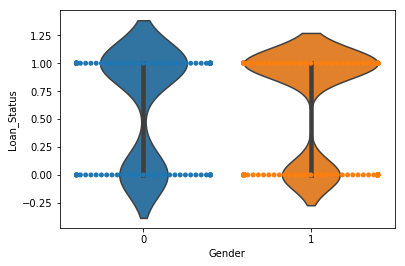

Married
0    193
1    350
dtype: int64


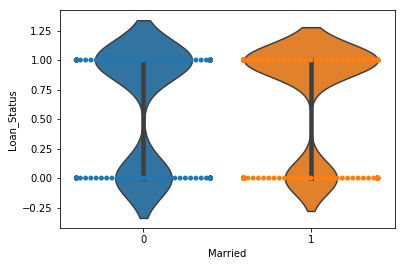

Dependents
0    319
1     86
2     92
3     46
dtype: int64


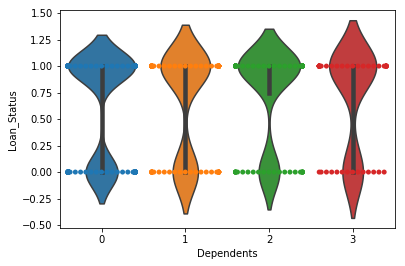

Education
0    429
1    114
dtype: int64


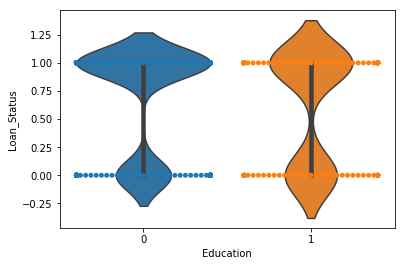

Self_Employed
0    471
1     72
dtype: int64


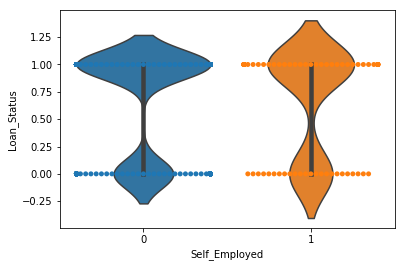

Loan_Amount_Term
36.0       2
60.0       2
84.0       3
120.0      3
180.0     41
240.0      2
300.0     10
360.0    466
480.0     14
dtype: int64


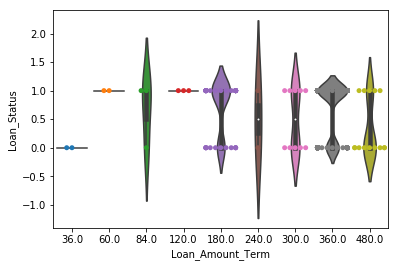

Credit_History
0.0     85
1.0    458
dtype: int64


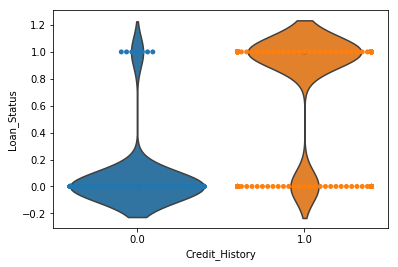

Property_Area
0    159
1    212
2    172
dtype: int64


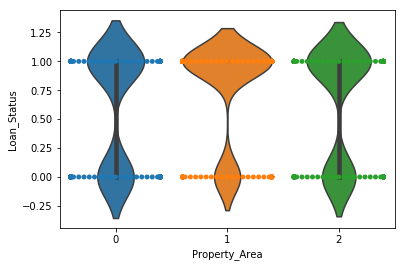

Loan_Status
0    169
1    374
dtype: int64


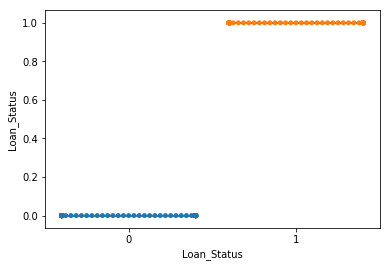

ratio_income_loan
1.111111      1
2.142857      1
4.011905      1
5.707965      1
6.694561      1
8.251497      1
8.298507      1
9.090909      1
9.151786      1
9.537634      1
11.143434     1
12.073034     1
12.090196     1
13.186170     1
13.427481     1
13.558011     1
13.793103     1
13.854651     1
14.037433     1
14.204545     1
14.444444     1
14.563107     1
14.946565     1
15.300578     1
15.365000     1
15.373134     1
15.553459     1
15.598540     1
15.618750     1
15.812121     1
             ..
81.955882     1
84.345238     1
84.635417     1
86.633929     1
87.944444     1
88.476190     1
94.681818     1
101.770833    1
102.650000    1
107.900000    1
110.166667    1
124.306667    1
128.386364    1
129.259184    1
130.176923    1
132.530120    1
138.360000    1
144.800000    1
145.320000    1
151.745455    1
155.000000    1
193.802326    1
210.307692    1
212.371429    1
225.000000    1
248.151316    1
264.222222    1
286.527273    1
326.225000    1
331.550000    1
Length

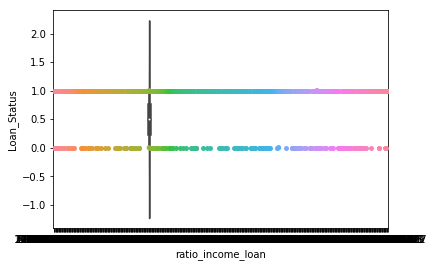

In [414]:
import seaborn as sns
for x in train.columns:
    print(train.groupby(x).size())
    sns.violinplot(train[x],train['Loan_Status'])  
    sns.swarmplot(train[x],train['Loan_Status'])  
    plt.show()

Gender
0     98
1    445
dtype: int64


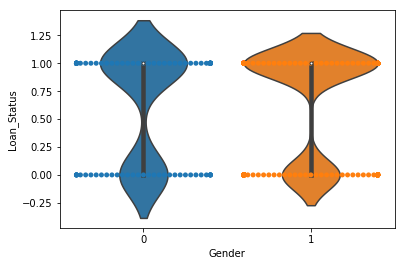

Married
0    193
1    350
dtype: int64


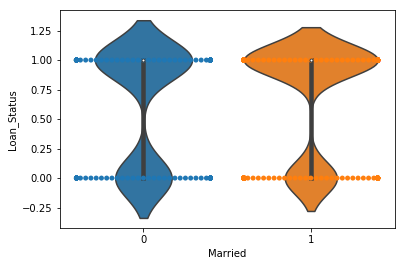

Dependents
0    319
1     86
2     92
3     46
dtype: int64


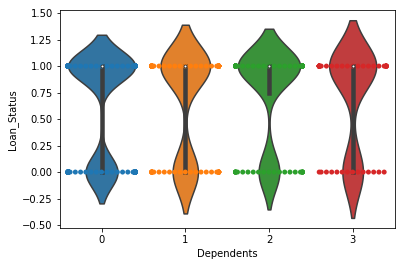

Education
0    429
1    114
dtype: int64


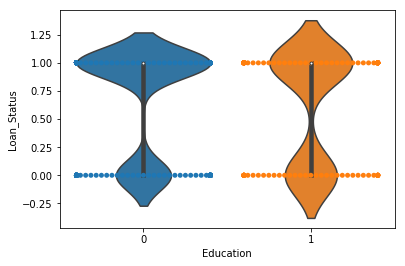

Self_Employed
0    471
1     72
dtype: int64


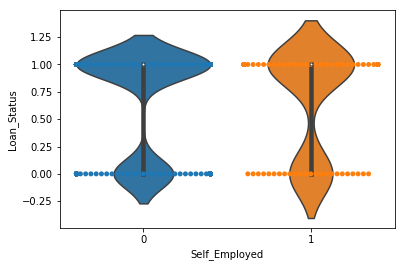

Loan_Amount_Term
36.0       2
60.0       2
84.0       3
120.0      3
180.0     41
240.0      2
300.0     10
360.0    466
480.0     14
dtype: int64


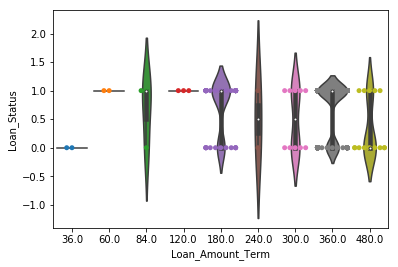

Credit_History
0.0     85
1.0    458
dtype: int64


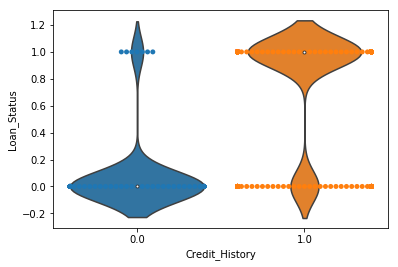

Property_Area
0    159
1    212
2    172
dtype: int64


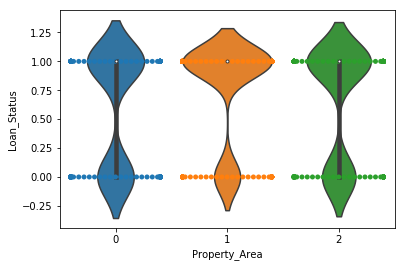

Loan_Status
0    169
1    374
dtype: int64


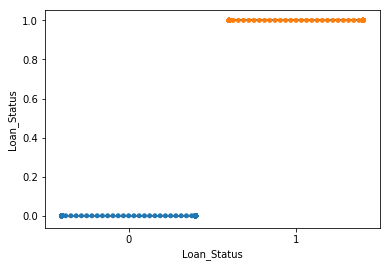

ratio_income_loan
1.111111      1
2.142857      1
4.011905      1
5.707965      1
6.694561      1
8.251497      1
8.298507      1
9.090909      1
9.151786      1
9.537634      1
11.143434     1
12.073034     1
12.090196     1
13.186170     1
13.427481     1
13.558011     1
13.793103     1
13.854651     1
14.037433     1
14.204545     1
14.444444     1
14.563107     1
14.946565     1
15.300578     1
15.365000     1
15.373134     1
15.553459     1
15.598540     1
15.618750     1
15.812121     1
             ..
81.955882     1
84.345238     1
84.635417     1
86.633929     1
87.944444     1
88.476190     1
94.681818     1
101.770833    1
102.650000    1
107.900000    1
110.166667    1
124.306667    1
128.386364    1
129.259184    1
130.176923    1
132.530120    1
138.360000    1
144.800000    1
145.320000    1
151.745455    1
155.000000    1
193.802326    1
210.307692    1
212.371429    1
225.000000    1
248.151316    1
264.222222    1
286.527273    1
326.225000    1
331.550000    1
Length

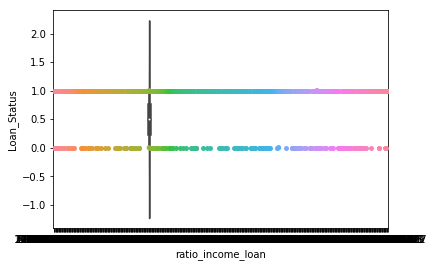

In [419]:
for x in train.columns:
    print(train.groupby(x).size())
    sns.swarmplot(train[x],train['Loan_Status'])  
    sns.violinplot(train[x],train['Loan_Status'])  
    plt.show()